<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Reinforcement_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://www.geeksforgeeks.org/what-is-reinforcement-learning/
#Reinforcement Learning (RL)
- Focuses on sequential decision-making
- Involves learning optimal behavior through trial and error (e.g., chess, text summarization)
- Two types: Positive RL & Negative RL

**Elements of RL**
- **Policy:** Agent's behavior at any time
- **Reward:** Feedback defining the goal
- **Value Function:** Estimates long-term rewards
- **Model of Environment:** Predicts future states for planning



**Advantages**
- Solves complex problems
- Corrects errors during training
- Handles uncertain environments
- Applicable in decision-making, control, optimization
- Can be combined with other ML techniques  

**Disadvantages**

- Not suited for simple problems
- Requires large data and computation
- Relies heavily on a well-designed reward function
- Difficult to debug and interpret

In [14]:
# CartPole Environment in OpenAI Gym: The CartPole environment is a classic reinforcement learning problem where the goal is to balance a pole on a cart by applying forces to the left or right.

import gym
import numpy as np
import warnings

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the environment with render mode specified
env = gym.make('CartPole-v1', render_mode="human")

# Initialize the environment to get the initial state
state = env.reset()

# Print the state space and action space
print("State space:", env.observation_space)
print("Action space:", env.action_space)

# Run a few steps in the environment with random actions
for _ in range(10):
    env.render()  # Render the environment for visualization
    action = env.action_space.sample()  # Take a random action

    # Take a step in the environment
    step_result = env.step(action)

    # Check the number of values returned and unpack accordingly
    if len(step_result) == 4:
        next_state, reward, done, info = step_result
        terminated = False
    else:
        next_state, reward, done, truncated, info = step_result
        terminated = done or truncated

    print(f"Action: {action}, Reward: {reward}, Next State: {next_state}, Done: {done}, Info: {info}")

    if terminated:
        state = env.reset()  # Reset the environment if the episode is finished

env.close()  # Close the environment when done


State space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action space: Discrete(2)
Action: 1, Reward: 1.0, Next State: [ 0.03083428  0.20064923  0.0443246  -0.31584093], Done: False, Info: {}
Action: 0, Reward: 1.0, Next State: [ 0.03484727  0.00492487  0.03800778 -0.00951556], Done: False, Info: {}
Action: 1, Reward: 1.0, Next State: [ 0.03494577  0.19948171  0.03781747 -0.28996846], Done: False, Info: {}
Action: 0, Reward: 1.0, Next State: [0.0389354  0.00384148 0.03201811 0.01439776], Done: False, Info: {}
Action: 0, Reward: 1.0, Next State: [ 0.03901223 -0.19172467  0.03230606  0.31700835], Done: False, Info: {}
Action: 1, Reward: 1.0, Next State: [0.03517774 0.00292259 0.03864623 0.03468613], Done: False, Info: {}
Action: 0, Reward: 1.0, Next State: [ 0.03523619 -0.19273163  0.03933995  0.3393075 ], Done: False, Info: {}
Action: 1, Reward: 1.0, Next State: [0.03138155 0.0018091  0.0461

Courtesy: https://www.geeksforgeeks.org/machine-learning-algorithms/

**Model-Based Methods:**
- i) Markov decision processes (MDPs)
- ii) Bellman equation
- iii) Value iteration algorithm
- iv) Monte Carlo Tree Search

**Model-Free Methods**

**i) Value-Based Methods:**

- Q-Learning
- SARSA
- Monte Carlo Methods

**ii) Policy-based Methods:**

- REINFORCE Algorithm
- Actor-Critic Algorithm

**iii) Actor-Critic Methods:**

- Asynchronous Advantage Actor-Critic (A3C)

#Model-based Methods
i) Makrov Decision Processes (MDPs)

The objective of an MDP is to find an **optimal policy ππ** that **maximizes the expected cumulative reward** for the agent **over time**.

MDP is defined below

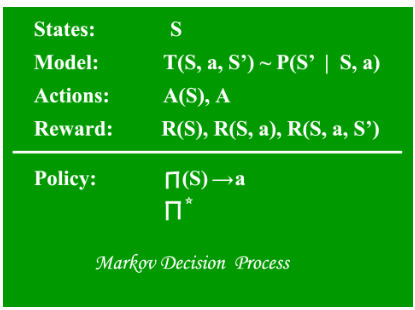

- **State:** is a set tokens that represent every state that the agent can be in
- **Action:** Set of actions that can be token being in state S
- **Reward:** i) Reward of State R(S), Reward of state-action R(S,a), Reward of transition R(S,a,S')
- **Policy:** Solution to the Markov Decision Process, mapping from **S** to **a**


**Features:** (ref: https://github.com/LeoMartinezTAMUK/Markov_Decision_Process)
- **Grid Setup:** A 5x5 grid with specified terminal and blocked states.
- **Actions:** The agent can move in four directions: up, down, left, and right.
- **Rewards:** Each state transition incurs a reward of -0.5, except for terminal states with fixed rewards.
- **Discount Factor:** The discount factor (γ) is set to 0.9, determining the importance of future rewards.
- **Value Iteration:** The utility values for each state are updated iteratively based on the Bellman equation.
- **Iterations:** The value iteration process is demonstrated for different numbers of iterations: 5, 10, 15, 20, 50, and 100.


**Applications**
- Robotics: Path planning and decision-making
- Game Development: Game Development: Creating intelligent agents
- Finance: Optimizing investment strategies
- Operations Research: Solving logistics and supply chain issues

MDPs: https://www.youtube.com/watch?v=UuTkioxL9bQ

In [9]:
#Problem Statement: Do you need umbrella

#(i) State: Rainy, Cloudy, Sunny
#(ii) Actions: Umbrella & No Umbrella
#(iii) Reward: Dictionary with each state-action pair
#(iv)Transition Prob
#(v) Discount Factor

Optimal policy:
{'Rainy': 'Umbrella', 'Cloudy': 'Umbrella', 'Sunny': 'No Umbrella'}


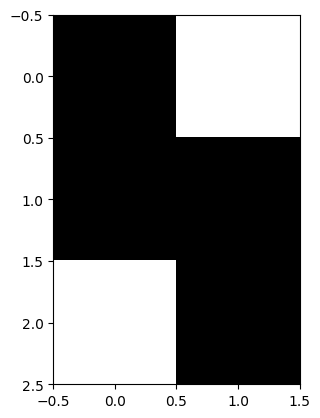

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MDP parameters
states = ['Rainy', 'Cloudy', 'Sunny']
actions = ['Umbrella', 'No Umbrella']
rewards = {'Rainy': {'Umbrella': -1, 'No Umbrella': -5},
           'Cloudy': {'Umbrella': -1, 'No Umbrella': -1},
           'Sunny': {'Umbrella': -5, 'No Umbrella': -1}}
transitions = {'Rainy': {'Umbrella': {'Rainy': 0.7, 'Cloudy': 0.3, 'Sunny': 0},
                         'No Umbrella': {'Rainy': 0.3, 'Cloudy': 0.4, 'Sunny': 0.3}},
               'Cloudy': {'Umbrella': {'Rainy': 0.4, 'Cloudy': 0.6, 'Sunny': 0},
                          'No Umbrella': {'Rainy': 0, 'Cloudy': 0.7, 'Sunny': 0.3}},
               'Sunny': {'Umbrella': {'Rainy': 0, 'Cloudy': 0, 'Sunny': 1},
                         'No Umbrella': {'Rainy': 0, 'Cloudy': 0.4, 'Sunny': 0.6}}}
discount_factor = 0.9

#Fn for value iter
def value_iteration():
    #init, the value fn for each state to 0
    V = {s: 0 for s in states}
    while True:
        #compute the updated value fn for each state
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                value = rewards[s][a]
                for s2 in states:
                    value += discount_factor * transitions[s][a][s2] * V[s2]
                values.append(value)
            new_V[s] = max(values)
        # Check convergence
        if all(abs(V[s] - new_V[s]) < 0.0001 for s in states):
            return new_V
        V = new_V
V = value_iteration()

#compute optimal policy
policy = {}
for s in states:
    values = []
    for a in actions:
        value = rewards[s][a]
        for s2 in states:
            value += discount_factor * transitions[s][a][s2] * V[s2]
        values.append(value)
    policy[s] = actions[np.argmax(values)]

print("Optimal policy:")
print(policy)

# Plot
policy_values = np.zeros((len(states), len(actions)))
for i, s in enumerate(states):
    for j, a in enumerate(actions):
        policy_values[i, j] = rewards[s][a] + discount_factor * sum(transitions[s][a][s2] * V[s2] for s2 in states)
plt.imshow(policy_values, cmap='Greys')

**Model-Based Methods:**

ii) Bellman equation (for expected cumulative reward): The **Log-term-reward** for an action is the sum of the immediate reward from the current action and the expected future reward from the next action
- In this scenario, the agent navigates a maze (environment) aiming to reach the trophy state (R = 1) for a Good reward and avoiding the fire state (R = -1) to prevent a Bad reward

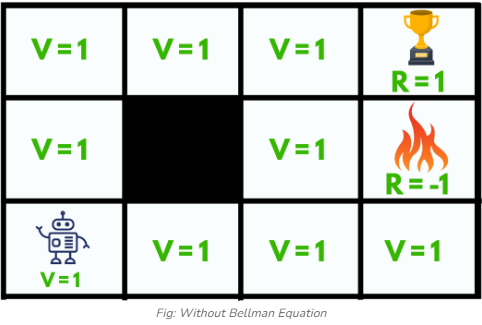


- **Bellman Equation:** V(s)=maxa(R(s,a)+ γV(s'))

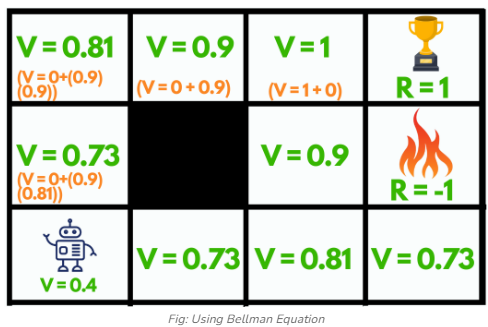



In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def reward(state, action):
    if state == 0 and state == 1:
        return 1
    elif state == 3 and action ==1:
        return 5
    else:
        return 0

def transition_prob(state, action, next_state):
    if state==0 and action == 1 and next_state==1:
        return 1
    elif state == 3 and action == 0 and next_state ==2:
        return 1
    elif state == next_state:
        return 0.5
    else:
        return 0

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


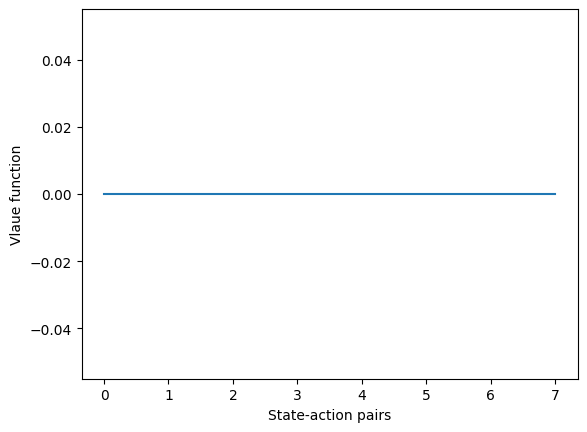

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


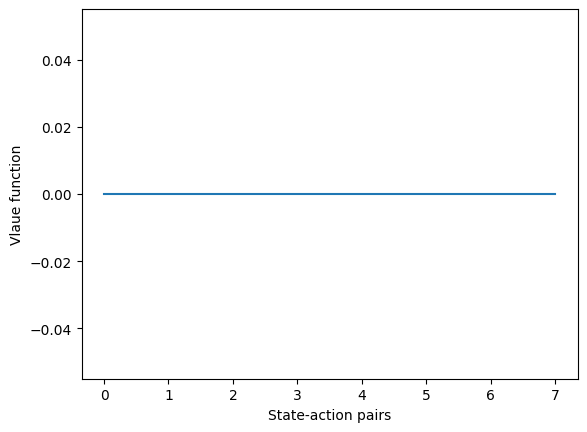

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


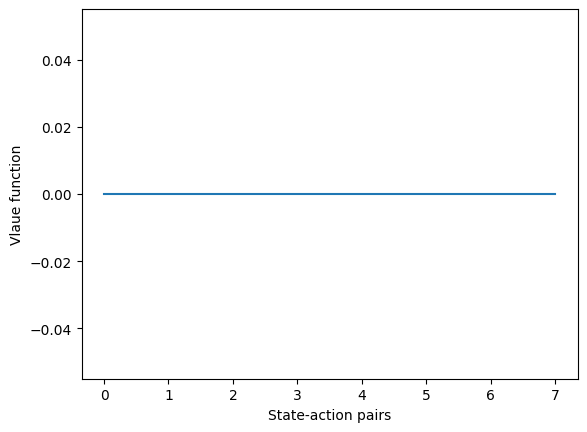

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


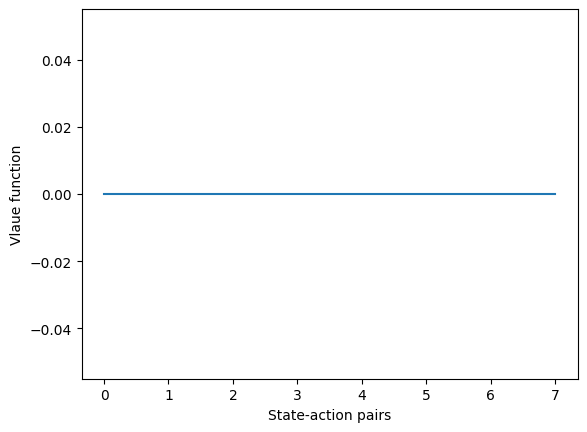

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


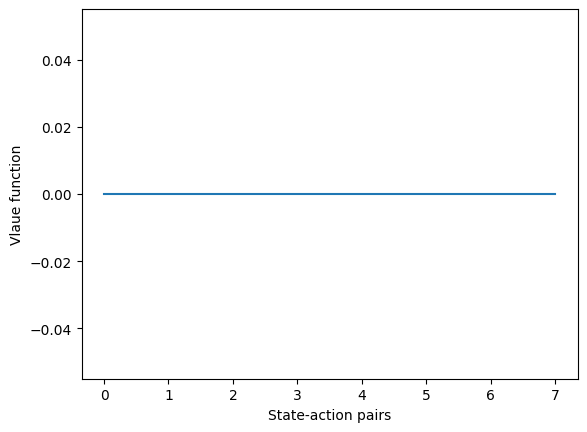

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


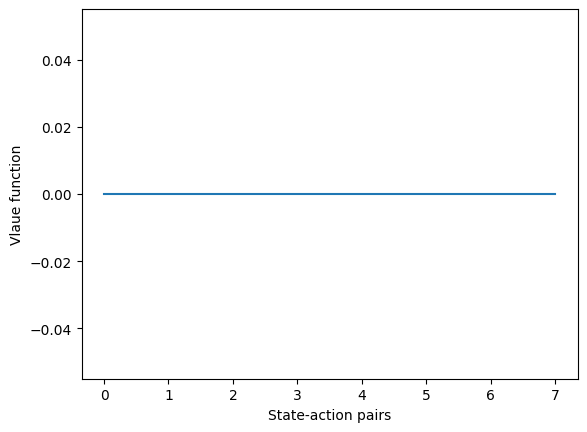

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


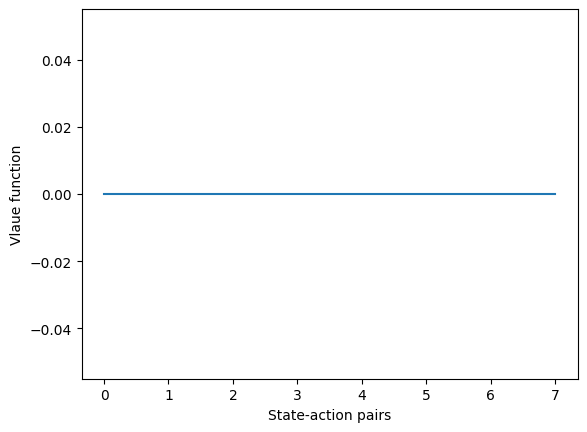

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


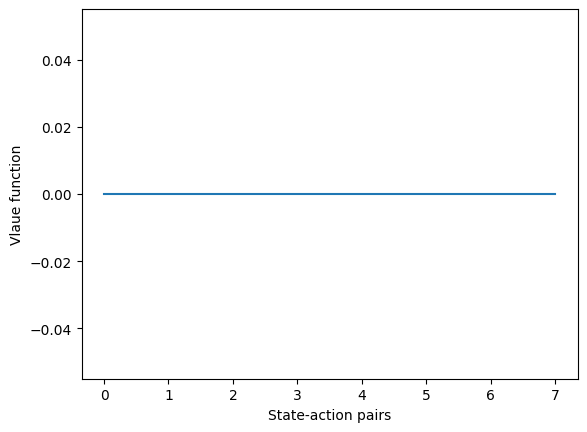

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


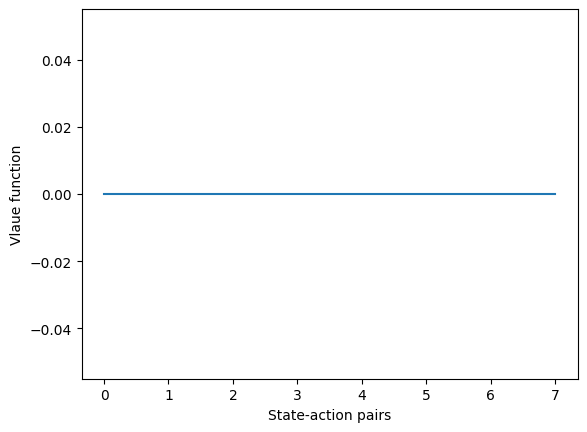

New Value Function: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


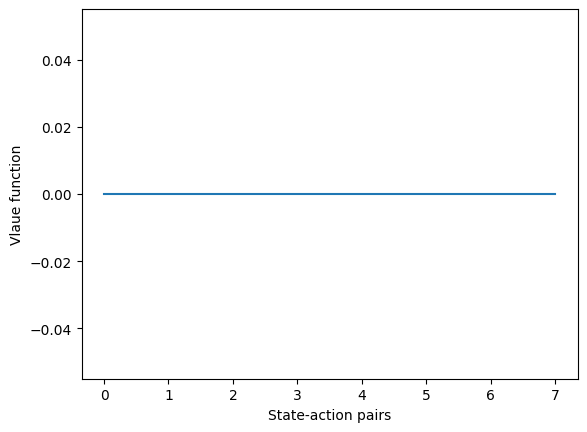

Optimal Value Function  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [13]:

def bellman_eqn(value, gamma):
    new_value = np.zeros_like(value)
    for state in range(value.shape[0]):
        max_value = -np.inf
        for action in range(value.shape[1]):
            action_value = 0
            for next_state in range(value.shape[0]):
                action_value += transition_prob(state, action, next_state) * (reward(state, action) + gamma * value[next_state, :].max())
                max_value = max(max_value, action_value)
                new_value[state, action] = action_value
            print('New Value Function:', new_value)
            plt.plot(new_value.flatten())
            plt.xlabel('State-action pairs')
            plt.ylabel("Vlaue function")
            plt.show()
        return new_value

def main():
    #value fn
    value = np.zeros((4,2))
    gamma = 0.9

    #Compute optimal val function
    for i in range(5):
        value = bellman_eqn(value, gamma)

    #print optimal val fn
    print('Optimal Value Function ', value)
if __name__ == "__main__":
    main()

**Model-Based Methods:**
iii) Value iteration algorithm:

Value iteration is a key algorithm in **Reinforcement Learning** and **Dynamic Programming** used to determine the **optimal policy** and **value function** for a **Markov Decision Process (MDP)**.


- **Initialization**: Start with an arbitrary value function V(s), typically initialized to zero for all states
- Value Update: Iteratively update the value function using the Bellman equation(to calculate the expected cumulative reward for taking action): Vk+1(s)=max⁡a∈A∑s′P(s'∣s, a)[R(s, a,s')+γVk(s')]Vk+1​(s)=a∈Amax​s'∑​P(s'∣s, a)[R(s, a,s')+γVk​(s')]

This computes the expected cumulative reward for taking action a, where P(s'∣s,a) is the transition probability, R(s,a,s') is the reward, and γ is the discount factor
- Convergence Check: Continue updating the value function until the change between iterations is smaller than a predefined threshold ϵ.
- Extract Policy: Once the value function has converged, derive the optimal policy by selecting the action that maximizes the expected cumulative reward:π∗(s)=arg⁡max⁡a∈A∑s′P(s′∣s, a)[R(s, a,s′)+γV∗(s′)]π∗(s)=arga∈Amax​s′∑​P(s′∣s, a)[R(s, a,s′)+γV∗(s′)]. This gives the optimal action to take from state s.


In [1]:
def value_iteration(states, actions, transition_model, reward_function, gamma, epsilon):
    # Initialize value function
    V = {s: 0 for s in states}

    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max(sum(transition_model(s, a, s_next) *
                           (reward_function(s, a, s_next) + gamma * V[s_next])
                           for s_next in states) for a in actions)
            delta = max(delta, abs(v - V[s]))

        # Check for convergence
        if delta < epsilon:
            break

    # Extract optimal policy
    policy = {}
    for s in states:
        policy[s] = max(actions,
                        key=lambda a: sum( transition_model(s, a, s_next) *  (reward_function( s, a, s_next) + gamma * V[s_next]) for s_next in states))
    return policy, V

#####Another Example: Implement Value Iteration Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_rows = 4
n_cols = 4
n_states = n_rows * n_cols
n_actions = 4
transitions = np.zeros((n_states,n_actions, n_states))
rewards = np.zeros((n_states,n_actions, n_states))
gamma = 0.9

for row in range(n_rows):
    for col in range(n_cols):
        s = row*n_cols+col
        for a in range(n_actions):
            if a ==0: #move up
                s1 = max(row-1, 0 ) * n_cols + col
            elif a ==1: #move down
                s1 = min(row+1, n_rows-1) * n_cols + col
            elif a == 2: #move left
                s1 = row * n_cols + max(col-1, 0 )
            else:
                s1 = row * n_cols + min(col+1, n_cols-1)
            transitions[s,a,s1] = 1.0
            rewards[s,a,s1] = -1.0 if s1 != n_states-1 else 0.0

In [15]:
transitions

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]])

In [6]:
def value_iteration(transitions, rewards, gamma, n_states, n_actions):
    v = np.zeros(n_states)
    v_history = [v.copy()]
    delta = 1

    #value iter loop:
    while delta > 1e-6:
        delta = 0
        for s in range(n_states):
            v_old = v[s]
            q = np.zeros(n_actions)
            for a in range(n_actions):
                q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
            v[s] = np.max(q)
            delta = max(delta, abs(v_old-v[s]))
        v_history.append(v.copy())


    #derive policy
    policy = np.zeros(n_states, dtype=int) # Changed np.int to int
    for s in range(n_states):
        q = np.zeros(n_actions)
        for a in range(n_actions):
            q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
        policy[s] = np.argmax(q)
    return policy, v, v_history

In [7]:
policy, v, v_history = value_iteration(transitions, rewards, gamma, n_states, n_actions)

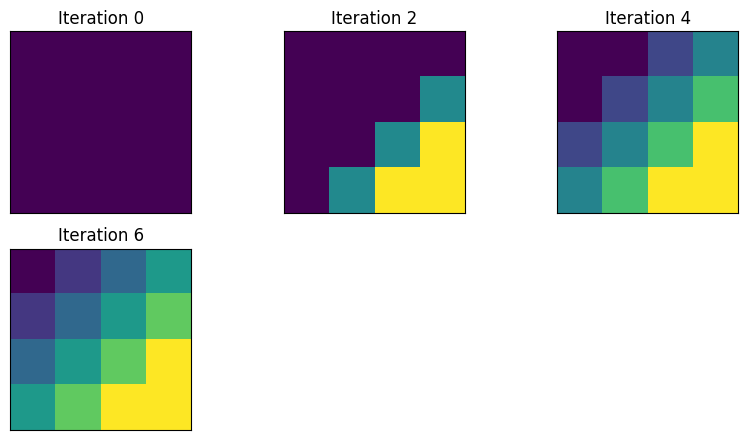

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

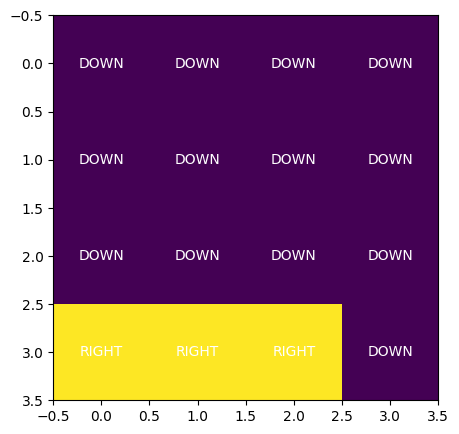

In [8]:
plt.figure(figsize=(10, 8))
for i in range(0, len(v_history), 2):
    plt.subplot(3,3, int(i/2+1))
    plt.imshow(v_history[i].reshape(n_rows, n_cols))
    plt.title('Iteration {}'.format(i))
    plt.xticks([])
    plt.yticks([])
plt.show()

actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
plt.figure(figsize=(6,5))
plt.imshow(policy.reshape(n_rows, n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        plt.text(col, row, actions[policy[row*n_cols + col]],
                color='white', ha='center', va='center')
plt

**Model-Based Methods:**
iv) Monte Carlo Tree Search (MCTS)
- Search technique in AI
- MCTS is a **probabilistic, heuristic-driven search algorithm** used in AI, combining classical tree-search techniques with reinforcement learning principles

**Advantages**
- Simple to implement
- Heuristically learns moves through random simulations (playouts)
- Can save its state at any point for future use
- Supports asymmetric tree expansion based on operational circumstances


**Disadvantages**
- Tree growth accelerates after a few iterations, requiring significant memory
- Reliability issues: one poor path can lead to failure in turn-based games
- Requires many iterations to find the most efficient path

In [22]:
#Monte Carlo implementation

In [21]:
import numpy as np
import copy
class GridWorld:
    def __init__(self):
        # S O O O
        # O O O *
        # O * O O
        # O * 0 T
        self.qTable = None
        self.actionSpace = ('U', 'D', 'L', 'R')
        self.actions = {
            (0, 0): ('D', 'R'),
            (0, 1): ('L', 'D', 'R'),
            (0, 2): ('L', 'D', 'R'),
            (0, 3): ('L', 'D'),
            (1, 0): ('U', 'D', 'R'),
            (1, 1): ('U', 'L', 'D', 'R'),
            (1, 2): ('U', 'L', 'D', 'R'),
            (1, 3): ('U', 'L', 'D'),
            (2, 0): ('U', 'D', 'R'),
            (2, 1): ('U', 'L', 'D', 'R'),
            (2, 2): ('U', 'L', 'D', 'R'),
            (2, 3): ('U', 'L', 'D'),
            (3, 0): ('U', 'R'),
            (3, 1): ('U', 'L', 'R'),
            (3, 2): ('U', 'L', 'R')
        }
        self.rewards = {(3, 3): 0.03, (1, 3): -0.01, (2, 1):-0.011, (3, 1):-0.01}
        self.explored = 0
        self.exploited = 0
        self.initialQtable()

    def initialQtable(self):
      self.qTable = {}
      for state in self.actions:
          self.qTable[state]={}
          for move in self.actions[state]:
              self.qTable[state][move]=0
      print(self.qTable)

    def updateQtable(self, newQ,updateRate=0.05):
        for state in self.qTable:
            for action in self.qTable[state]:
                self.qTable[state][action] = self.qTable[state][action]+(updateRate*(newQ[state][action]-self.qTable[state][action]))

    def getRandomPolicy(self):
        policy = {}
        for state in self.actions:
            policy[state] = np.random.choice(self.actions[state])
        return policy

    def reset(self):
        return (0, 0)

    def is_terminal(self, s):
        return s not in self.actions

    def getNewState(self,state,action):
      i, j = zip(state)
      row = int(i[0])
      column = int(j[0])
      if action == 'U':
          row -= 1
      elif action == 'D':
          row += 1
      elif action == 'L':
          column -= 1
      elif action == 'R':
          column += 1
      return row,column

    def chooseAction(self, state, policy, exploreRate):
        if exploreRate > np.random.rand():
            self.explored += 1
            return np.random.choice(self.actions[state])
        self.exploited += 1
        return policy[state]

    def move(self, state, policy, exploreRate):
        action = self.chooseAction(state, policy, exploreRate)
        row,column=self.getNewState(state,action)
        if (row, column) in self.rewards:
            return action,(row, column),self.rewards[(row, column)]
        return action,(row, column), 0

    def printPolicy(self, policy):
        line = ""
        counter = 0
        for item in policy:
            line += f" | {policy[item]} | "
            counter += 1
            if counter > 3:
                print(line)
                print("----------------------------")
                counter = 0
                line = ""
        print(line)
        print("----------------------------")


enviroment = GridWorld()
policy = enviroment.getRandomPolicy()
enviroment.printPolicy(policy)

for i in range(1001):
  estimatedQ = copy.deepcopy(enviroment.qTable)
  for state in estimatedQ:
      for action in estimatedQ[state]:
          estimatedQ[state][action] = 0
  collectedSampls = 0
  for j in range(1000):
    trajectory = []
    state = enviroment.reset()
    stepCounts=0

    while (not enviroment.is_terminal(state)) and (stepCounts<30):
      action,nextState, reward = enviroment.move(state, policy, exploreRate=0.05)
      trajectory.append(((state, action), reward))
      state=nextState
      stepCounts+=1
    collectedSampls += 1
    rewards=0
    for item in reversed(trajectory):
            q,reward=zip(item)
            rewards +=0.9*(reward[0])
            estimatedQ[q[0][0]][q[0][1]] = estimatedQ[q[0][0]][q[0][1]] + ((1 / collectedSampls) * (rewards - estimatedQ[q[0][0]][q[0][1]]))
    enviroment.updateQtable(estimatedQ)
    for state in policy:
        policy[state] = max(enviroment.qTable[state], key=enviroment.qTable[state].get)
  if (i%100)==0:
    print(f"\n\n\n step:{i}")
    # enviroment.printVaues(values)
    enviroment.printPolicy(policy)

print(f"exploited:{enviroment.exploited}  explored:{enviroment.explored}")






print(enviroment.exploited, enviroment.explored)

{(0, 0): {'D': 0, 'R': 0}, (0, 1): {'L': 0, 'D': 0, 'R': 0}, (0, 2): {'L': 0, 'D': 0, 'R': 0}, (0, 3): {'L': 0, 'D': 0}, (1, 0): {'U': 0, 'D': 0, 'R': 0}, (1, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 3): {'U': 0, 'L': 0, 'D': 0}, (2, 0): {'U': 0, 'D': 0, 'R': 0}, (2, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 3): {'U': 0, 'L': 0, 'D': 0}, (3, 0): {'U': 0, 'R': 0}, (3, 1): {'U': 0, 'L': 0, 'R': 0}, (3, 2): {'U': 0, 'L': 0, 'R': 0}}
 | R |  | D |  | L |  | L | 
----------------------------
 | R |  | R |  | R |  | L | 
----------------------------
 | U |  | U |  | U |  | L | 
----------------------------
 | R |  | U |  | U | 
----------------------------



 step:0
 | D |  | L |  | R |  | L | 
----------------------------
 | U |  | U |  | D |  | D | 
----------------------------
 | U |  | U |  | D |  | L | 
----------------------------
 | R |  | R |  | R | 
----------------------------



 step:100
 | R | 

**Model-Free Methods**

**i) Value-Based Methods:**

- Q-Learning (1. Agent + 2. States + 3. Actions + 4. Rewards + 5. Episodes + 6. Q-values)
- SARSA
- Monte Carlo Methods(above)

#Q-Learning
####Q-Learning involves the agent exploring the environment and continuously updating its model based on this exploration

Components to collaborate in the Q-learning algorithm
- 1. **Agent**: The entity making decisions and actions within the environment
- 2. **States**: The current position or situation of the agent in the environment
- 3. **Actions**: Operations the agent can perform in specific states
- 4. **Rewards**: Feedback (positive or negative) provided based on the agent's actions
- 5. **Episodes**: Complete cycles where the agent's actions lead to a conclusion
- 6. **Q-values**: Metrics used to evaluate the quality of actions at specific states

#####Methods for determining Q-Values
- Temporal Difference: Q-values are updated by comparing the current state-action values with previous ones
- Bellman's Equation (Q(s, a)=R(s, a)+γmax_a​Q(s', a)), A recursive formula to calculate Q-values

####Advantages of Q-Learning
- Effectively finds long-term optimal strategies
- Mimics human learning behavior
- Model can fix mistakes during training
- Corrects mistakes during training, reducing recurrence
- Can produce an ideal model for specific tasks

####Disadvantages of Q-Learning
- Expensive when using real-world samples (e.g., robots)
- Often needs to be combined with deep learning algorithms

####Applications of Q-Learning
- Atari Game playing.
- Robot control.
- Traffic management.
- Algorithmic trading.
- Personalized treatment planning in healthcare.

In [27]:
#Q-Learning: Value-based Methods - Model-free Methods
#Helps an agent to learn the optimal action-selection policy by iteratively updating Q-values (representing the expected rewards of actions in specific states)

import numpy as np # Define the environment
n_states = 16 # Number of states in the grid world
n_actions = 4 # Number of possible actions (up, down, left, right)
goal_state = 15 # Goal state # Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions)) # Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000 # Q-learning algorithm
for epoch in range(epochs):
  current_state = np.random.randint(0, n_states) # Start from a random state
while current_state != goal_state: # Choose action with epsilon-greedy strategy
  if np.random.rand() < exploration_prob:
    action = np.random.randint(0, n_actions) # Explore
  else:
    action = np.argmax(Q_table[current_state]) # Exploit
  # Simulate the environment (move to the next state)
  # For simplicity, move to the next state
  next_state = (current_state + 1) % n_states # Define a simple reward function (1 if the goal state is reached, 0 otherwise)
  reward = 1 if next_state == goal_state else 0 # Update Q-value using the Q-learning update rule
  Q_table[current_state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action])
  current_state = next_state # Move to the next state # After training, the Q-table represents the learned Q-values
  print("Learned Q-table:")
  print(Q_table)


Learned Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Learned Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Learned Q-table:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.8 0.  0.  0. ]
 [0.  0.  0.  0. ]]


#Another example
Courtesy: https://github.com/codehax41/Reinforcement-Learning/blob/main/6.Q%20learning.ipynb

In [28]:
import numpy as np
import matplotlib.pyplot as plt
#rewards
rewards = np.array([[-1,0,0,10],
                  [-1,0,0,10],
                   [-1,0,0,10],
                   [-1,0,0,0]
                   ])

#transition
transitions = np.array([
    [[0.5, 0.5,0,0], [0.5, 0,0.5,0], [0, 0.5,0,0.5], [0, 0,1,0]],
    [[0, 1,0,0], [1, 0, 0 , 0], [0, 0 , 0.5, 0.5], [0,0,1,0]],
    [[0, 0, 0.5, 0.5], [0, 0.5,0, 0.5], [0, 0.5,0, 0.5], [0,0,1,0]],
    [[0,0,0,1], [0, 0, 0.5, 0.5], [0, 0.5, 0, 0.5], [0.5, 0.5, 0, 0]],
])

In [29]:
#Q learning algorithm
def q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes):
    n_states, n_actions, _ = transitions.shape
    q_table = np.zeros((n_states, n_actions))

    total_rewards = []
    for episode in range(n_episodes):
        state = 0
        done = False
        total_reward = 0
        while not done:
            if np.random.rand()<epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(q_table[state])
            new_state = np.random.choice(np.arange(n_states), p=transitions[state, action]/np.sum(transitions[state, action]))
            reward = rewards[state, action]
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])
            state = new_state
            total_reward += reward
            if state==n_states-1:
                done = True
        total_rewards.append(total_reward)
    plt.plot(total_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.show()

    return q_table

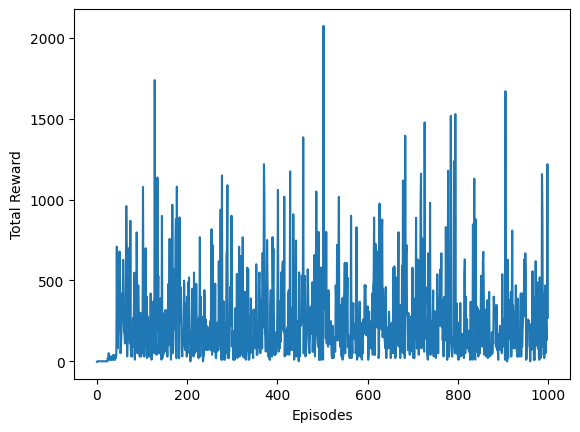

Converged Q Value [[ 88.99252434  90.           5.36997127 100.        ]
 [ 88.98507925  90.           6.50665283 100.        ]
 [ 14.51722939  44.87048653  65.23089123 100.        ]
 [  0.           0.           0.           0.        ]]


In [30]:
gamma = 0.9
alpha = 0.5
epsilon = 0.1
n_episodes = 1000
q_table = q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes)


#Print
print("Converged Q Value", q_table)

#ii) Value-Based Methods

**SARSA (State-Action-Reward-State-Action) Reinfocement Learning**: SARSA is a variant of the **Q-Learning** algorithm, where the learning agent updates its Q-values based on the current state-action pair and the next state-action pair.

- i) **On Policy:** The agent learns the **value function** based on the actions derived from the **current policy** it is following

- ii) **Off Policy:** The agent learns the **value function** based on actions derived from a **different policy** than the one it is currently following

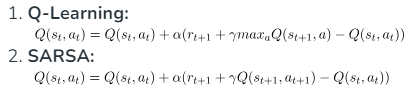

In [32]:
#Step 1: Importing the required libraries
import numpy as np
import gym
#Step 2: Building the environment
env = gym.make('CartPole-v0')
#Step 3: Initializing different parameters
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
# Get the number of discrete actions for the action space
n_actions = env.action_space.n
# Discretize the continuous observation space for the Q-table
# Define the number of bins for each dimension of the observation space
num_bins = [10, 10, 10, 10]  # Example: 10 bins for each of the 4 state variables
# Define the ranges for each dimension of the observation space
state_bins = [
    np.linspace(env.observation_space.low[0], env.observation_space.high[0], num_bins[0] + 1)[1:-1],  # Cart Position
    np.linspace(env.observation_space.low[1], env.observation_space.high[1], num_bins[1] + 1)[1:-1],  # Cart Velocity
    np.linspace(env.observation_space.low[2], env.observation_space.high[2], num_bins[2] + 1)[1:-1],  # Pole Angle
    np.linspace(env.observation_space.low[3], env.observation_space.high[3], num_bins[3] + 1)[1:-1]   # Pole Velocity At Tip
]
# Function to discretize the state
def discretize_state(state):
    discrete_state = [np.digitize(state[i], state_bins[i]) for i in range(len(state))]
    return tuple(discrete_state)

# Initialize the Q-table using the discretized state space
Q = np.zeros(tuple(num_bins) + (n_actions,))

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [35]:
#Step 4: Defining Utility Functions to be used in the Learning Process

#Function to choose the next action
def choose_action(state):
    # Discretize the state before using it as an index
    discrete_state = discretize_state(state)
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[discrete_state])  # Use discretized state here
    return action

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    # Discretize the states before using them as indices
    discrete_state = discretize_state(state)
    discrete_state2 = discretize_state(state2)
    predict = Q[discrete_state + (action,)]  # Use discretized state and action for indexing
    target = reward + gamma * Q[discrete_state2 + (action2,)] # Use discretized state and action for indexing
    Q[discrete_state + (action,)] = Q[discrete_state + (action,)] + alpha * (target - predict) # Use discretized state and action for indexing

In [36]:
#Step 5: Training the Learning Agent
#Initializing the reward
reward=0

# Starting the SARSA learning
for episode in range(total_episodes):
	t = 0
	state1 = env.reset()
	action1 = choose_action(state1)

	while t < max_steps:
		#Visualizing the training
		env.render()

		#Getting the next state
		state2, reward, done, info = env.step(action1)

		#Choosing the next action
		action2 = choose_action(state2)

		#Learning the Q-value
		update(state1, state2, reward, action1, action2)

		state1 = state2
		action1 = action2

		#Updating the respective vaLues
		t += 1
		reward += 1

		#If at the end of learning process
		if done:
			break


KeyboardInterrupt: 

In [ ]:
#Step 6: Evaluating the Performance
#Evaluating the performance
print ("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)

#ii) Value-Based Methods

**Monte Carlo Integration in Python**

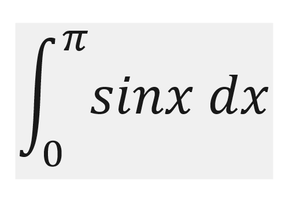

In [39]:
!pip install scipy

In [41]:
# importing the modules
from scipy import random #to get random value between the limits of the integral
import numpy as np #form arrays and storing different values

# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# array of zeros of length N
ar = np.zeros(N)

# iterating over each Value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):
	ar[i] = random.uniform(a,b)

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# iterates and sums up values of different functions
# of x
for i in ar:
	integral += f(i)

# we get the answer by the formula derived adobe
ans = (b-a)/float(N)*integral

# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))


ImportError: cannot import name 'random' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [42]:
#Visualizing integral results using histogram

# importing the modules
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):

	#array of zeros of length N
	ar = np.zeros(N)

	# iterating over each Value of ar and filling it
	# with a random value between the limits a and b
	for i in range (len(ar)):
		ar[i] = random.uniform(a,b)

	# variable to store sum of the functions of different
	# values of x
	integral = 0.0

	# iterates and sums up values of different functions
	# of x
	for i in ar:
		integral += f(i)

	# we get the answer by the formula derived adobe
	ans = (b-a)/float(N)*integral

	# appends the solution to a list for plotting the graph
	plt_vals.append(ans)

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
plt.hist (plt_vals, bins=30, ec="black")

# to be made, bins, separators colour between the
# beams)
# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot


ImportError: cannot import name 'random' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

#Model-Free Methods -> ii) Policy-based Methods

####a) REINFORCE Algorithm
- Adjusts the weights of a neural network after each trial
- A **Monte-Carlo** variant of a **Policy-Gradient** algorithm, estimating the expected reward by sampling states, actions, and rewards, and updating the policy based on those samples
- The policy gradient is represented by a parametric function (neural network), which takes the environment's state as input and outputs a probability distribution over possible actions
- **RE**ward **I**ncrement = **N**on-negative **F**actor * **O**ffset **R**einforcement * **C**haracteristic **E**ligibility

####REINFORCE Algorithm
- i) Set up the policy parameters
- ii) Collect paths/ trajectories
- iii) Determine Returns (expected cumulative rewards)
- iv) Calculate the Policy Gradient
- v) Update the Policy parameters
- vi) Repeat step (ii) through (v) multiple times for optimal results

In [43]:
import numpy as np

# Initialization
def initialize_policy(num_actions):
    return np.random.rand(num_actions)

# Other functions
def collect_trajectories():
    # For simplicity, let's assume a fixed trajectory for each episode
    states = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    actions = [0, 1, 2]
    rewards = [0.1, 0.5, 0.2]
    return states, actions, rewards

def compute_returns(rewards):
    # Assume this function computes returns from rewards
    pass

def compute_policy_gradient(states, actions, returns):
    # Assume this function computes the policy gradient
    pass

def update_policy_parameters(policy_gradient):
    # Assume this function updates the policy parameters using the gradient
    pass

# Example Python Code

# Initialization
num_actions = 3
policy_parameters = initialize_policy(num_actions)

# Training loop
num_episodes = 1000
for episode in range(num_episodes):
    # Collect trajectories
    states, actions, rewards = collect_trajectories()

    # Compute returns
    returns = compute_returns(rewards)

    # Compute policy gradient
    policy_gradient = compute_policy_gradient(states, actions, returns)

    # Update policy parameters
    update_policy_parameters(policy_gradient)

# Final policy
final_policy_parameters = policy_parameters

# Print final policy parameters
print("Final Policy Parameters:", final_policy_parameters)


Final Policy Parameters: [0.81416284 0.23676664 0.29400559]


#Model-Free Methods -> ii) Policy based Methods

####b) **Actor-Centric Methods**

- **Actor-Critic Algorithm** combines aspects of both **Policy-based methods (Actor)** and **Value-based methods (Critic)** to overcome their individual limitations
- In this framework, the **actor (agent)** learns a policy to make decisions, while the critic evaluates the actions taken by estimating their value or quality
- The **critic** provides feedback to the actor, helping refine its decisions by assessing the effectiveness of the chosen actions
- This dual role enables a balance between **exploration** (trying new actions) and **exploitation** (choosing the best-known actions), **combining** the strengths of both **policy and value** functions

**Advantages of Actor Critic Algorithm**
- **Improved Sample Efficiency:** Actor-Critic algorithms, with their hybrid approach, reduce the number of environment interactions needed for optimal performance
- **Faster Convergence:** Concurrent updates to both policy and value functions allow for quicker learning and faster convergence during training
- **Versatility Across Action Spaces:** These methods can handle both discrete and continuous action spaces, providing flexibility for a wide range of RL tasks
- **Off-Policy Learning (in some variants):** Capable of learning from past experiences, even when they do not follow the current policy




In [6]:
#i) Import Libraries
import numpy as np
import tensorflow as tf
import gym

In [7]:
#ii) Create the CartPole Environment
env = gym.make('CartPole-v1')

In [9]:
#iii) Define the actor and critic networks: Actor and the Critic are implemented as NNs using TensorFlow's Keras API + Actor network maps the state to a probability distribution over actions + Critic network estimates the state's value
actor = tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(env.action_space.n, activation='softmax')])
critic = tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu'), tf.keras.layers.Dense(1)])

In [11]:
#iv) Define Optimizers and Loss Functions (Adam optimizer and loss functions)
actor_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
critic_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [13]:
#v) The training loop runs for 1000 episodes. Each episode resets the environment and initializes the reward. Using `tf.GradientTape`, gradients for the actor and critic are computed.
# The agent selects an action, observes the next state, reward, and checks if the episode is done.
# The advantage function is calculated, and actor/critic losses are computed.
# Gradients are applied to update the networks, and the reward is updated. Every 10 episodes, the episode number and reward are printed.

# Main training loop
num_episodes = 1000
gamma = 0.99
for episode in range(num_episodes):
  state = env.reset()
  episode_reward = 0
  with tf.GradientTape(persistent=True) as tape:
    for t in range(1, 10000): # Limit the number of time steps # Choose an action using the actor
      action_probs = actor(np.array([state]))
      action = np.random.choice(env.action_space.n, p=action_probs.numpy()[0]) # Take the chosen action and observe the next state and reward
      next_state, reward, done, _ = env.step(action) # Compute the advantage
      state_value = critic(np.array([state]))[0, 0]
      next_state_value = critic(np.array([next_state]))[0, 0]
      advantage = reward + gamma * next_state_value - state_value # Compute actor and critic losses
      actor_loss = -tf.math.log(action_probs[0, action]) * advantage
      critic_loss = tf.square(advantage)
      episode_reward += reward # Update actor and critic
      actor_gradients = tape.gradient(actor_loss, actor.trainable_variables)
      critic_gradients = tape.gradient(critic_loss, critic.trainable_variables)
      actor_optimizer.apply_gradients(zip(actor_gradients, actor.trainable_variables))
      critic_optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))
      if done:
        break
      if episode % 10 == 0:
        print("Episode {episode}, Reward: {episode_reward}")
        env.close()


Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {episode_reward}
Episode {episode}, Reward: {epis

#Model-Free Methods -> (iii) Actor-Critic Methods

####**Asynchronous Advanvantage Actor-Critic (A3C)**

- A deep reinforcement learning algorithm
- Agents interact with environments **asynchronously**, learning from each interaction
- Controlled by a **global network**, where each agent contributes to its overall knowledge
- Combines **Actor-Critic** methods: predicting both the value function V(s) and the optimal policy function
- Utilizes a **probabilistic action distribution** for decision-making
- Advantages: Uses **Policy Gradient** and **discounted returns r** to guide the agent by rewarding and penalizing its actions

**Advantages of A3C**
- Faster and more robust than traditional reinforcement learning algorithms.
- Outperforms other techniques by diversifying knowledge through asynchronous agents.
- Applicable to both discrete and continuous action spaces


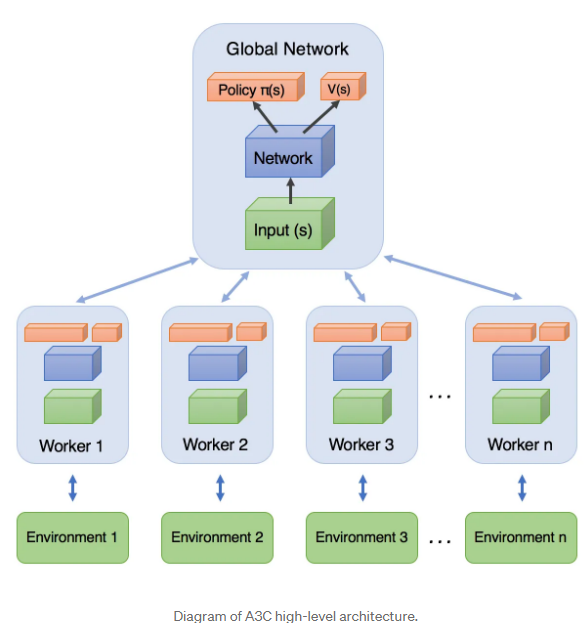

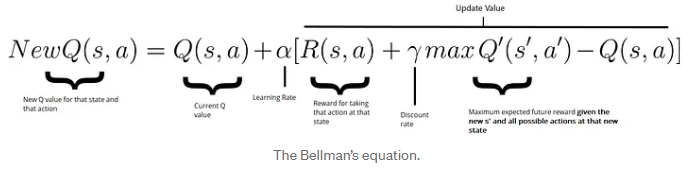


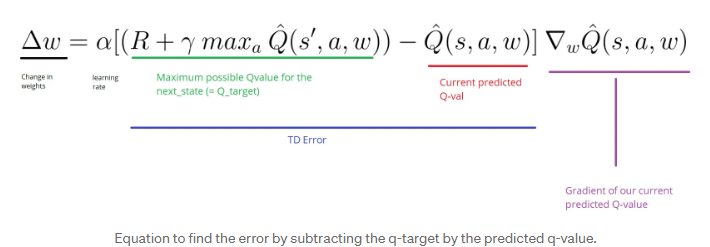




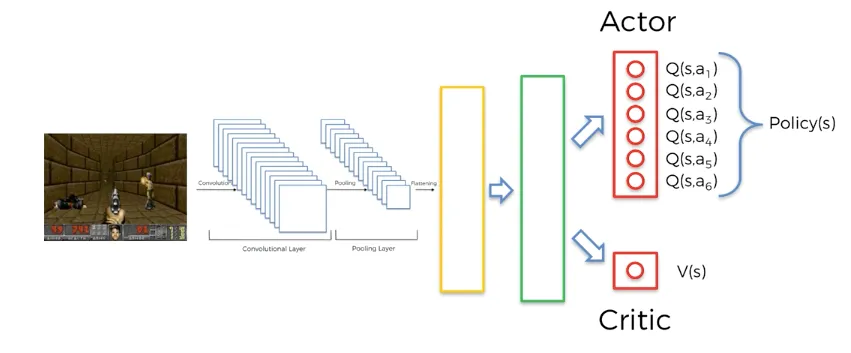




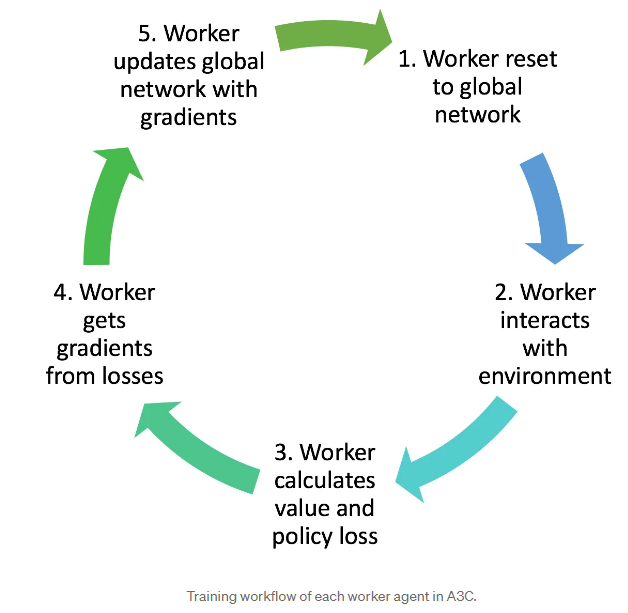

Courtesy: https://medium.com/@shagunm1210/implementing-the-a3c-algorithm-to-train-an-agent-to-play-breakout-c0b5ce3b3405

Code Courtesy:https://ray-robert.readthedocs.io/en/latest/example-a3c.html



In [21]:
!pip install tensorflow
!pip install six
!pip install gym[atari]
!pip install opencv-python
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00


In [23]:
!pip install ray

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 12.5 MB/s eta 0:00:00


In [24]:
import numpy as np
import ray

@ray.remote
class Runner(object):
  """Actor object to start running simulation on workers.
      Gradient computation is also executed on this object."""
  def __init__(self, env_name, actor_id):
    # starts simulation environment, policy, and thread.
    # Thread will continuously interact with the simulation environment
    self.env = env = create_env(env_name)
    self.id = actor_id
    self.policy = LSTMPolicy()
    self.runner = RunnerThread(env, self.policy, 20)
    self.start()

  def start(self):
    # starts the simulation thread
    self.runner.start_runner()

  def pull_batch_from_queue(self):
    # Implementation details removed - gets partial rollout from queue
    return rollout

  def compute_gradient(self, params):
    self.policy.set_weights(params)
    rollout = self.pull_batch_from_queue()
    batch = process_rollout(rollout, gamma=0.99, lambda_=1.0)
    gradient = self.policy.get_gradients(batch)
    info = {"id": self.id,
            "size": len(batch.a)}
    return gradient, info

In [25]:
import numpy as np
import ray

def train(num_workers, env_name="PongDeterministic-v3"):
  # Setup a copy of the environment
  # Instantiate a copy of the policy - mainly used as a placeholder
  env = create_env(env_name, None, None)
  policy = LSTMPolicy(env.observation_space.shape, env.action_space.n, 0)
  obs = 0

  # Start simulations on actors
  agents = [Runner(env_name, i) for i in range(num_workers)]

  # Start gradient calculation tasks on each actor
  parameters = policy.get_weights()
  gradient_list = [agent.compute_gradient.remote(parameters) for agent in agents]

  while True: # Replace with your termination condition
    # wait for some gradient to be computed - unblock as soon as the earliest arrives
    done_id, gradient_list = ray.wait(gradient_list)

    # get the results of the task from the object store
    gradient, info = ray.get(done_id)[0]
    obs += info["size"]

    # apply update, get the weights from the model, start a new task on the same actor object
    policy.model_update(gradient)
    parameters = policy.get_weights()
    gradient_list.extend([agents[info["id"]].compute_gradient(parameters)])
  return policy

Another

In [27]:
!pip install ray[rllib]  # Install Ray with RLlib for reinforcement learning tools
!pip install tensorflow  # Install TensorFlow for deep learning
!pip install gym[atari]  # Install Gym with Atari environments

In [33]:
import ray
import gym
import tensorflow as tf
import numpy as np
from tensorflow.keras.saving import register_keras_serializable  # Import the decorator
from ray.util.serialization import register_serializer, deregister_serializer

# Define the Actor-Critic network
@register_keras_serializable()  # Register the class for serialization
class ActorCriticNetwork(tf.keras.Model):
    def __init__(self, num_actions):
        super(ActorCriticNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.actor_layer = tf.keras.layers.Dense(num_actions, activation='softmax')
        self.critic_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        actor_output = self.actor_layer(x)
        critic_output = self.critic_layer(x)
        return actor_output, critic_output

# Custom serializer and deserializer for ActorCriticNetwork
def actor_critic_network_serializer(obj):
    return obj.get_config(), obj.get_weights()

def actor_critic_network_deserializer(config, weights):
    model = ActorCriticNetwork(**config)
    model.set_weights(weights)
    return model

# Register the custom serializer and deserializer with Ray
# The register_serializer function is deprecated for custom types.
# Instead of using it directly, use the following for newer Ray versions.
# Register your custom serialization and deserialization functions for your ActorCriticNetwork class:
try:
    # Ray 2.x uses `register_custom_serializer`
    from ray.util.serialization import register_custom_serializer
    register_custom_serializer(
        ActorCriticNetwork,
        serializer=actor_critic_network_serializer,
        deserializer=actor_critic_network_deserializer
    )
except ImportError:
    # Ray 1.x and below uses `register_serializer` with custom types
    from ray.util.serialization import register_serializer, deregister_serializer
    register_serializer(
        ActorCriticNetwork,
        serializer=actor_critic_network_serializer,
        deserializer=actor_critic_network_deserializer
    )

# ... (rest of your code)

# Define the A3C agent
class A3CAgent:
    def __init__(self, env_name, gamma=0.99, learning_rate=0.001):
        self.env_name = env_name
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.env = gym.make(env_name)
        self.num_actions = self.env.action_space.n
        self.model = ActorCriticNetwork(self.num_actions)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    def train(self, num_episodes=1000):
        # Check if Ray is already initialized
        if not ray.is_initialized():
            ray.init()  # Initialize Ray only if not already initialized

        @ray.remote
        class Worker:
            def __init__(self, agent):
                self.agent = agent
                self.env = gym.make(agent.env_name)

            def run_episode(self):
                state = self.env.reset()
                episode_reward = 0
                done = False
                while not done:
                    with tf.GradientTape() as tape:
                        action_probs, state_value = self.agent.model(np.array([state]))
                        action = np.random.choice(self.agent.num_actions, p=action_probs.numpy()[0])
                        next_state, reward, done, _ = self.env.step(action)
                        advantage = reward + self.agent.gamma * self.agent